In [42]:
import numpy as np

In [43]:
import pandas as pd

In [44]:
from keras.utils import np_utils

In [45]:
np.random.seed(10)

In [46]:
from keras.datasets import mnist

In [47]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [48]:
print("train data=", len(x_train_image))

train data= 60000


In [49]:
print(" test =", len(x_test_image))

 test = 10000


In [50]:
print("x_train_image shape=", x_train_image.shape)

x_train_image shape= (60000, 28, 28)


In [51]:
print("x_train_label shape=", y_train_label.shape)

x_train_label shape= (60000,)


In [52]:
import matplotlib.pyplot as plt

In [53]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap="binary")
    plt.show()

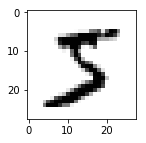

In [54]:
plot_image(x_train_image[0])

In [55]:
y_train_label[0]

5

In [56]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" + str(labels[idx])
        if len(prediction)>0:
            title=title+",prediction="+str(prediction[idx])
            
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

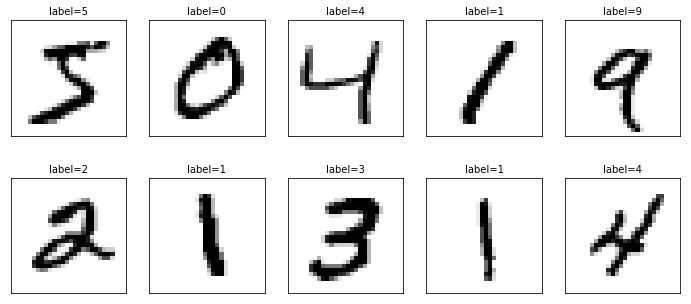

In [57]:
plot_images_labels_prediction(x_train_image, y_train_label, [], 0, 10)

In [58]:
print('x_test_image:', x_test_image.shape)
print('y_test_label:', y_test_label.shape)

x_test_image: (10000, 28, 28)
y_test_label: (10000,)


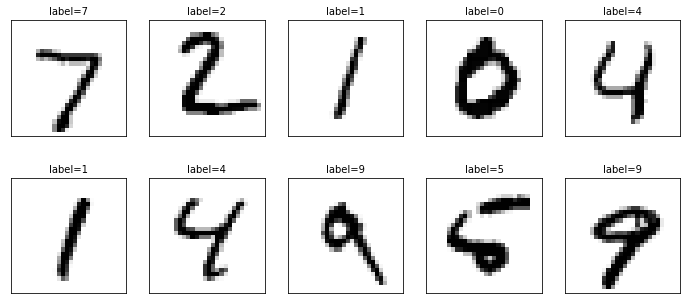

In [59]:
plot_images_labels_prediction(x_test_image, y_test_label, [], 0 , 10)

In [60]:
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [61]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [62]:
print('x_train:', x_Train.shape)
print('x_test:', x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [63]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [64]:
x_Train_normalize[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [65]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [66]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

In [67]:
from keras.models import Sequential
from keras.layers import Dense

In [68]:
model = Sequential()

In [69]:
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

In [70]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [71]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [72]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
1s - loss: 0.4383 - acc: 0.8829 - val_loss: 0.2181 - val_acc: 0.9407
Epoch 2/10
1s - loss: 0.1910 - acc: 0.9455 - val_loss: 0.1554 - val_acc: 0.9557
Epoch 3/10
1s - loss: 0.1356 - acc: 0.9619 - val_loss: 0.1259 - val_acc: 0.9650
Epoch 4/10
1s - loss: 0.1028 - acc: 0.9705 - val_loss: 0.1124 - val_acc: 0.9680
Epoch 5/10
1s - loss: 0.0811 - acc: 0.9773 - val_loss: 0.0982 - val_acc: 0.9713
Epoch 6/10
1s - loss: 0.0660 - acc: 0.9819 - val_loss: 0.0936 - val_acc: 0.9725
Epoch 7/10
1s - loss: 0.0545 - acc: 0.9850 - val_loss: 0.0914 - val_acc: 0.9738
Epoch 8/10
1s - loss: 0.0461 - acc: 0.9876 - val_loss: 0.0824 - val_acc: 0.9763
Epoch 9/10
1s - loss: 0.0382 - acc: 0.9903 - val_loss: 0.0824 - val_acc: 0.9757
Epoch 10/10
1s - loss: 0.0318 - acc: 0.9917 - val_loss: 0.0811 - val_acc: 0.9764


In [74]:
import matplotlib.pyplot as plt

In [75]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

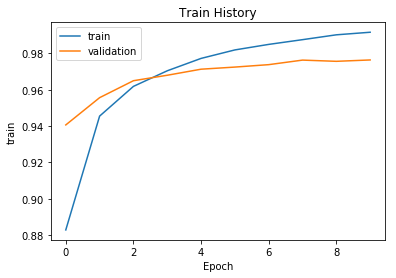

In [76]:
show_train_history(train_history, 'acc', 'val_acc')

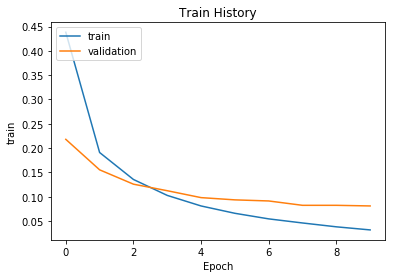

In [77]:
show_train_history(train_history, 'loss', 'val_loss')

In [78]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print("")
print('Accuracy=', scores[1])

 8864/10000 [=========================>....] - ETA: 0s
Accuracy= 0.9756


In [79]:
prediction = model.predict_classes(x_Test)

 9888/10000 [============================>.] - ETA: 0s

In [80]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

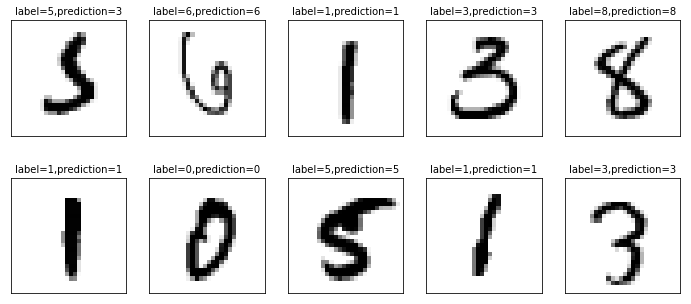

In [82]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

In [83]:
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,0,1,1,0,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,5,0,1010,2,1,0,2,4,8,0
3,0,0,5,992,0,0,0,3,6,4
4,2,0,5,1,958,0,3,0,3,10
5,3,0,0,15,1,852,7,1,10,3
6,6,3,3,1,3,3,937,0,2,0
7,0,5,13,6,1,0,0,988,6,9
8,5,0,3,6,2,1,2,2,952,1


In [86]:
df = pd.DataFrame( {'label':y_test_label, 'predict':prediction} )
print(df.shape)
df[:2]

(10000, 2)


,label,predict
0,7,7
1,2,2


In [90]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
4271,5,3
4355,5,3


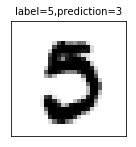

In [93]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=2810, num=1)

In [97]:
model = Sequential()
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [106]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
6s - loss: 0.0042 - acc: 0.9988 - val_loss: 0.1052 - val_acc: 0.9770
Epoch 2/20
6s - loss: 0.0062 - acc: 0.9982 - val_loss: 0.1011 - val_acc: 0.9775
Epoch 3/20
6s - loss: 0.0013 - acc: 0.9997 - val_loss: 0.0820 - val_acc: 0.9808
Epoch 4/20
6s - loss: 2.9546e-04 - acc: 1.0000 - val_loss: 0.0811 - val_acc: 0.9829
Epoch 5/20
6s - loss: 1.5237e-04 - acc: 1.0000 - val_loss: 0.0830 - val_acc: 0.9829
Epoch 6/20
6s - loss: 1.1963e-04 - acc: 1.0000 - val_loss: 0.0839 - val_acc: 0.9827
Epoch 7/20
6s - loss: 1.0046e-04 - acc: 1.0000 - val_loss: 0.0845 - val_acc: 0.9825
Epoch 8/20
6s - loss: 8.5929e-05 - acc: 1.0000 - val_loss: 0.0857 - val_acc: 0.9823
Epoch 9/20
6s - loss: 7.5546e-05 - acc: 1.0000 - val_loss: 0.0862 - val_acc: 0.9826
Epoch 10/20
6s - loss: 6.6070e-05 - acc: 1.0000 - val_loss: 0.0867 - val_acc: 0.9826
Epoch 11/20
6s - loss: 5.8515e-05 - acc: 1.0000 - val_loss: 0.0870 - val_acc: 0.9830
Epoch 12/20
6s - loss: 5.2311e-05 - 

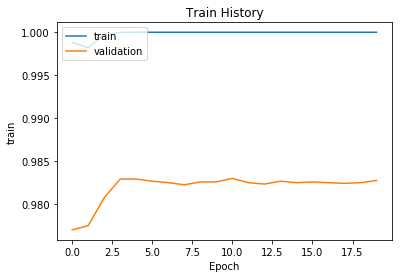

In [107]:
show_train_history(train_history, 'acc', 'val_acc')

In [108]:
from keras.layers import Dropout

In [114]:
model = Sequential()
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [115]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [116]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
6s - loss: 0.3204 - acc: 0.9058 - val_loss: 0.1575 - val_acc: 0.9562
Epoch 2/20
6s - loss: 0.1373 - acc: 0.9601 - val_loss: 0.1134 - val_acc: 0.9678
Epoch 3/20
6s - loss: 0.0926 - acc: 0.9730 - val_loss: 0.0917 - val_acc: 0.9728
Epoch 4/20
6s - loss: 0.0703 - acc: 0.9795 - val_loss: 0.0835 - val_acc: 0.9741
Epoch 5/20
6s - loss: 0.0553 - acc: 0.9840 - val_loss: 0.0792 - val_acc: 0.9746
Epoch 6/20
6s - loss: 0.0430 - acc: 0.9873 - val_loss: 0.0698 - val_acc: 0.9794
Epoch 7/20
6s - loss: 0.0355 - acc: 0.9898 - val_loss: 0.0721 - val_acc: 0.9786
Epoch 8/20
6s - loss: 0.0288 - acc: 0.9914 - val_loss: 0.0654 - val_acc: 0.9800
Epoch 9/20
6s - loss: 0.0254 - acc: 0.9928 - val_loss: 0.0659 - val_acc: 0.9801
Epoch 10/20
6s - loss: 0.0221 - acc: 0.9938 - val_loss: 0.0699 - val_acc: 0.9786
Epoch 11/20
6s - loss: 0.0183 - acc: 0.9946 - val_loss: 0.0726 - val_acc: 0.9800
Epoch 12/20
6s - loss: 0.0168 - acc: 0.9949 - val_loss: 0.0705 - val

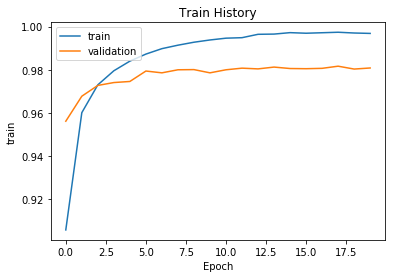

In [117]:
show_train_history(train_history, 'acc', 'val_acc')

In [118]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=', scores[1])

 9984/10000 [============================>.] - ETA: 0s
accuracy= 0.982


In [119]:
model = Sequential()
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))

In [120]:
model.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))

In [121]:
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [122]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [124]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
14s - loss: 0.2844 - acc: 0.9121 - val_loss: 0.1184 - val_acc: 0.9641
Epoch 2/20
14s - loss: 0.1148 - acc: 0.9644 - val_loss: 0.0941 - val_acc: 0.9720
Epoch 3/20
14s - loss: 0.0782 - acc: 0.9749 - val_loss: 0.0837 - val_acc: 0.9747
Epoch 4/20
14s - loss: 0.0623 - acc: 0.9791 - val_loss: 0.0834 - val_acc: 0.9743
Epoch 5/20
14s - loss: 0.0498 - acc: 0.9835 - val_loss: 0.0791 - val_acc: 0.9776
Epoch 6/20
14s - loss: 0.0400 - acc: 0.9867 - val_loss: 0.0857 - val_acc: 0.9763
Epoch 7/20
14s - loss: 0.0359 - acc: 0.9883 - val_loss: 0.0784 - val_acc: 0.9774
Epoch 8/20
14s - loss: 0.0327 - acc: 0.9890 - val_loss: 0.0856 - val_acc: 0.9781
Epoch 9/20
14s - loss: 0.0312 - acc: 0.9896 - val_loss: 0.0739 - val_acc: 0.9810
Epoch 10/20
14s - loss: 0.0284 - acc: 0.9903 - val_loss: 0.0757 - val_acc: 0.9802
Epoch 11/20
14s - loss: 0.0224 - acc: 0.9927 - val_loss: 0.0757 - val_acc: 0.9823
Epoch 12/20
14s - loss: 0.0237 - acc: 0.9919 - val_loss: 

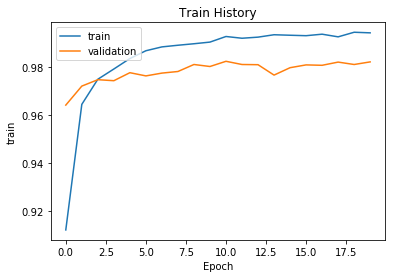

In [125]:
show_train_history(train_history, 'acc', 'val_acc')

In [126]:
scores = model.evaluate(x_Test_normalize, y_TestOneHot)
print()
print('accuracy=', scores[1])

 9824/10000 [============================>.] - ETA: 0s
accuracy= 0.9841
